Yelp review text sentiment and star rating analysis
===

I'm going to look at data from Yelp to see how correlated text review sentiment and star rating are. I was inspired to look at text sentiment vs star rating after reading a reddit post about a hotel with awful service that threatened customers if they didn't give the hotel a good review. Customers retaliated by giving high star ratings, but written reviews that were quite negative. I wondered whether I could find instances like this in the Yelp reviews.

Unfortunately, Yelp has a very restrictive API policy. Yelp has, however, provided review data for download here: https://www.yelp.com/dataset/challenge.

This data is in the form of .json, which is frequently what you'd pull from an API.

First I'll import the modules I need:

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.stats.stats import pearsonr

Read in the data .json file:

In [3]:
reviewData = open("yelp_academic_dataset_review.json", "r").readlines()

Make a dictionary and read in the first 500,000 reviews:

In [4]:
businessInfo = {}    # Make an empty dictionary
for d in reviewData[0:500000]:
  parsed = json.loads(d)
  business = parsed["business_id"]
  score = parsed["stars"]
  text = parsed["text"]
  tb = TextBlob(text)
  polarity = tb.sentiment.polarity
  businessData = businessInfo.get(business, [])  # Get the list of scores and polarities out of businessInfo. If there's no entry for that business yet, get an empty list.
  businessData.append((score, polarity,))         # Append a tuple to businessData. businessData is always a list of tuples where the first value is the score and the second value is the polarity.
  businessInfo[business] = businessData

Let's print a small subset of the dictionary to see what we've got:

In [5]:
# this would print the whole dictionary, which is not really what we want here.
# for key, value in businessInfo.items():
#    print (key, value)

def get_range(dictionary, begin, end):
  return {k: v for k, v in dictionary.items() if begin <= k <= end}

get_range(businessInfo,'2aFiy99vNLklCx3T_tGS9A','2affqR8mmNPuW1HdnFUAng') # this shows us a subset of 4 keys (businesses) in the dictionary

{'2aFiy99vNLklCx3T_tGS9A': [(5, 0.24333333333333337),
  (5, 0.022857142857142878),
  (5, 0.3333333333333333)],
 '2aSq50bdUoc1nOAJzK4eiw': [(5, 0.12341269841269838),
  (3, 0.16527777777777777),
  (3, 0.04317226890756303),
  (4, 0.5),
  (2, -0.055388471177944876)],
 '2aVpQXXlA9GdGZOwMmycKQ': [(1, -0.3666666666666667),
  (1, -0.19166666666666665),
  (1, 0.02777777777777778)],
 '2affqR8mmNPuW1HdnFUAng': [(5, 0.6275000000000002),
  (5, 0.15273366784730422),
  (3, 0.10078125),
  (2, 0.09772727272727272),
  (3, 0.09675438596491229)]}

Well, that output isn't very pretty, but we can see that each business ID is now associated with a list of paired star ratings and text sentiments. I intentionally chose some businesses with few reviews so that the output wasn't gigantic. Most of them have quite a few reviews.

Iterate over all the items in the dictionary using the form "key, value" and create a separate list for each business of the separate scores and polarities:

In [8]:
scores = []
polarities = []
allMedianScores = []
allMedianPolarities = []
allMeanScores = []
allMeanPolarities = []
for business, scoreAndPolarity in businessInfo.items(): # Iterates over all the items in the dictionary using the form "key, value". # Changed dict.iteritems to dict.items for python3 
  for x in range(len(scoreAndPolarity)): # Creates a separate list for each business of the separate scores and polarities
  	scores.append((scoreAndPolarity[x])[0])
  	polarities.append((scoreAndPolarity[x])[1])
  medianScore=np.median(scores)
  medianPolarity=np.median(polarities) 
  allMedianScores.append(medianScore)
  allMedianPolarities.append(medianPolarity)
  meanScore=np.mean(scores)
  meanPolarity=np.mean(polarities)
  allMeanScores.append(meanScore)
  allMeanPolarities.append(meanPolarity)

Save a plot for the median text sentiment vs median star rating per business:

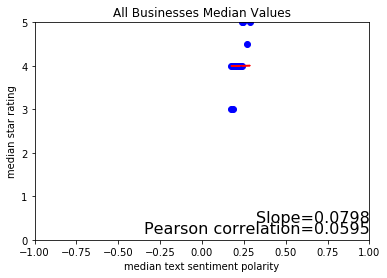

In [9]:
x=np.array(allMedianPolarities)
y=np.array(allMedianScores)
correlation = pearsonr(allMedianPolarities, allMedianScores)
m, b = np.polyfit(x, y, 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'bo')
ax.plot(x, m*x + b, 'r-')
ax.set_title("All Businesses Median Values") 
ax.annotate("Slope="+str(round(m,4)), xy=(1, 0.1), xycoords='axes fraction', fontsize=16, horizontalalignment='right', verticalalignment='center')
ax.annotate("Pearson correlation="+str(round(correlation[0],4)), xy=(1, 0.05), xycoords='axes fraction', fontsize=16, horizontalalignment='right', verticalalignment='center')
ax.set_xlabel('median text sentiment polarity')
ax.set_ylabel('median star rating')
ax.set_ylim([0,5])
ax.set_xlim([-1,1])
plt.show()
filename = "allBusinessmedians.png"
fig.savefig(filename)
plt.close()

There were no businesses in the first 500,000 reviews that had a median star rating below 3 or a median text sentiment below 0. Median text sentiment did not vary much between business, with most written reviews being mildly positive. Perhaps the average will give a better picture of what's going on in these reviews.

Save a plot for the average text sentiment vs average star rating per business:

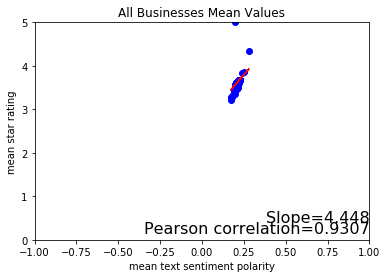

In [10]:
x=np.array(allMeanPolarities)
y=np.array(allMeanScores)
correlation = pearsonr(allMeanPolarities, allMeanScores)
m, b = np.polyfit(x, y, 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'bo')
ax.plot(x, m*x + b, 'r-')
ax.set_title("All Businesses Mean Values") 
ax.annotate("Slope="+str(round(m,4)), xy=(1, 0.1), xycoords='axes fraction', fontsize=16, horizontalalignment='right', verticalalignment='center')
ax.annotate("Pearson correlation="+str(round(correlation[0],4)), xy=(1, 0.05), xycoords='axes fraction', fontsize=16, horizontalalignment='right', verticalalignment='center')
ax.set_xlabel('mean text sentiment polarity')
ax.set_ylabel('mean star rating')
ax.set_ylim([0,5])
ax.set_xlim([-1,1])
plt.show()
filename = "allBusinessmeans.png"
fig.savefig(filename)
plt.close()

If star rating and text sentiment were perfectly and linearly correlated, we should expect to see a slope of 1. A steeper slope shows that star rating increases more rapidly than text sentiment. The high pearson correlation tells us that the positive trend is relatively consistent in the data. In other words, people are more likely to give a high star rating than they are to use extremely positive language in their text review. Again we see that there are no businesses in the first 500,000 reviews of the dataset with a very poor star rating of below 3/5.

Based on the fact that we see no instances of very poor correlation (really, I was looking for anti-correlation) between text sentiment of reviews and star rating, but we have anecdotes of such cases existing, it seems to me that Yelp may have removed instances like these from the data they provide for the dataset challenge.

Thanks to Chris Agocs for helping me get up and running on this project, with help collaborating on code for the dictionary. I learned a great deal about the language in the process much faster than I could have on my own.

Future directions:

Find different correlations in the data for star review: hours, whether they allow dogs, location, etc.

Show that textblob sentiment really is working correctly. I verified this for myself, but I should show it here.

Show the average number and distribution of reviews per business.

Find the real business names in the separate .json file.